<a href="https://colab.research.google.com/github/venu-analytics/Analytics-Projects/blob/main/Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn** occurs when subscriber or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service. As mentioned in the problem statement **if the user didn’t make a payment on the app after making the first payment**.

**5 Reasons why customer retention is important** :
1. Companies save money on marketing.
2. Repeat purchases from repeat customers means repeat profit.
3. Free word-of-mouth advertising.
4. Retained customers provide valuable feedback.
5. Previous customers will pay premium prices.

Let's drive the insights from given churn data by using **python**.

In [56]:
# Import all the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sb

In [58]:
# Upload given data to colab
from google.colab import files
uploaded = files.upload()

Saving data_for_churn_analysis.csv to data_for_churn_analysis.csv


Load the given data

In [59]:
data = pd.read_csv('data_for_churn_analysis.csv')
data.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
0,xiaomi,7.0,25.0,Bangalore,1.0,2.0,0.0,1.0,7.0,NaN,0.0,False,0.0,1.0,1,1,30034,1.0
1,xiaomi,5.0,31.0,Surat,1.0,1.0,0.0,1.0,5.0,1.0,3.0,True,0.0,0.0,1,1,185940,1.0
2,samsung,3.0,24.0,Visakhapatnam,3.0,2.0,0.0,2.0,124.0,NaN,0.0,False,0.0,0.0,1,1,175110,1.0
3,yu,0.0,29.0,Jaipur,1.0,2.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,124751,1.0
4,oppo,2.0,30.0,NaN,3.0,1.0,0.0,1.0,2.0,1.0,0.0,False,0.0,0.0,0,0,368768,1.0


## Analyse the data
Get the number of rows and columns in the data set.

In [60]:
data.shape

(104143, 18)

So, the data set contains 1,04,143 customers and 18 data points on each customer. Next will see all the columns in the data set.

In [61]:
# Show all the column names
data.columns.values

array(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days',
       'reward_purchase_count_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'user_id',
       'is_churned'], dtype=object)

Let's see some statistics on the data set.

In [62]:
# Show statistics on the current data
data.describe()

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
count,104143.000000,104001.000000,103671.000000,103671.000000,103671.000000,103671.000000,103671.000000,80879.000000,103671.000000,101497.000000,101497.000000,104143.000000,104143.000000,104143.000000,104143.000000
mean,34.771353,32.688291,1.989148,2.847402,0.439940,1.830676,55.965381,2.042075,22.494102,0.239643,0.126861,0.852318,0.723332,251829.347273,0.286808
std,73.181032,7.821752,1.871436,4.223077,1.061101,3.210357,130.720128,3.731290,64.122134,0.624616,0.445573,0.354786,0.447353,146009.671697,0.452273
min,0.000000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,124478.500000,0.000000
50%,12.000000,31.000000,1.000000,2.000000,0.000000,1.000000,21.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,252377.000000,0.000000
75%,37.000000,36.000000,3.000000,3.000000,0.000000,2.000000,64.000000,3.000000,20.000000,0.000000,0.000000,1.000000,1.000000,378186.500000,1.000000
max,4370.000000,80.000000,30.000000,359.000000,30.000000,337.000000,11107.000000,304.000000,8857.000000,17.000000,23.000000,1.000000,1.000000,503533.000000,1.000000


Next, get the number of customers that churned and were retained (did not churn).

In [64]:
# Get the number of customers that churned
data['is_churned'].value_counts()

0.0    74274
1.0    29869
Name: is_churned, dtype: int64

About 74,274 customers were retained (did not churn) and 29,869 customers were churned. Let's show this count visually using a bar plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


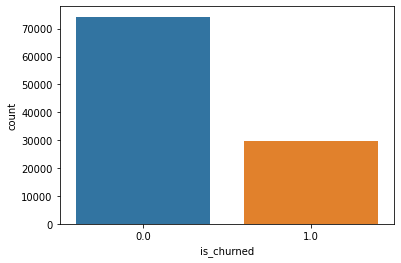

In [65]:
# Visualize the count of customer churn
sb.countplot(data['is_churned'])

Let's check what percentage of customers are leaving.

In [66]:
# What percentage of customers are leaving?
retained = data[data.is_churned == 0.0]
churned = data[data.is_churned == 1.0]

num_retained = retained.shape[0]
num_churned = churned.shape[0]

print( num_retained / (num_retained + num_churned)*100, "% of customers are using the app")
print( num_churned / (num_retained + num_churned)*100, "% of customers left the app")

71.31924373217595 % of customers are using the app
28.680756267824048 % of customers left the app


So, about 71.31% of the customers are using the App or were retained and about 28.68% of the customers churned. When we are trying to evaluate the model to predict customer churn, this is important information because it means that just by always guessing a random customer to have been retained from the data set, I have a 71.31% chance of guessing correctly. So, I want the model accuracy to classify/predict if a customer will churn to be higher than that percentage.

Let's take a look at the churn count by device.

(-0.7, 14.7)

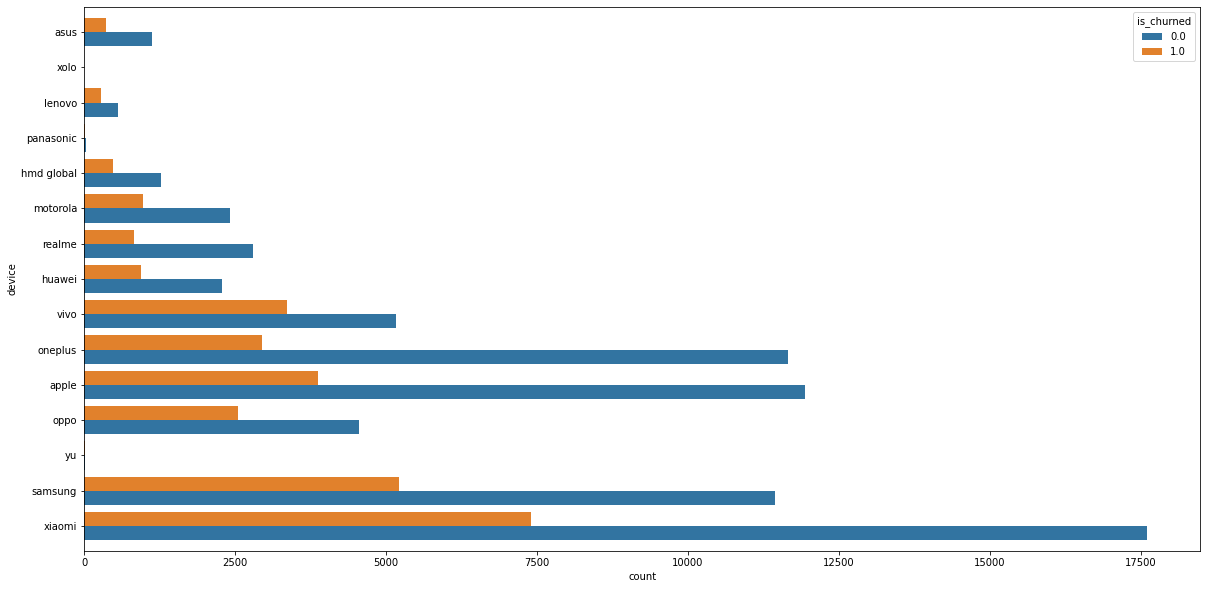

In [67]:
# Visualize the churn count for each device
dims = (20,10)
fig,ax = pyplot.subplots(figsize=dims)
sb.countplot(ax=ax, y='device', hue='is_churned', data=data)
ax.set_ylim(-0.7, 14.7)

By looking at the above image devices play one of the major role in customer churn, it might be related with the push notifications of the Application.

For instance, most of older version devices won't be getting the push notifications on time. This need to be checked with the technical team.

In [68]:
data['first_payment_amount'].value_counts()

0.0       16792
3.0        7763
2.0        7280
17.0       4206
7.0        3534
          ...  
1418.0        1
1327.0        1
1338.0        1
1241.0        1
589.0         1
Name: first_payment_amount, Length: 717, dtype: int64

(-0.7, 14.7)

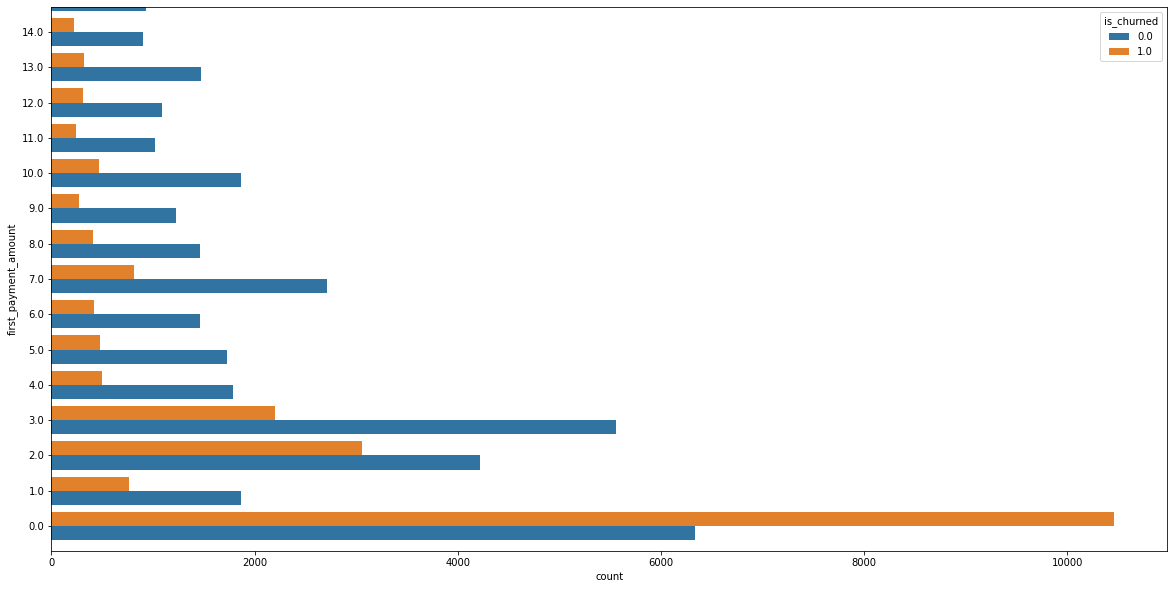

In [69]:
# Visualize the churn count as per first payment
dims = (20,10)
fig,ax = pyplot.subplots(figsize=dims)
sb.countplot(ax=ax, y='first_payment_amount', hue='is_churned', data=data)
ax.set_ylim(-0.7, 14.7)

### We can see a issue here
Here we can see the majority of the customers (16792/29869) who has not done any first payment are marked as churned.

**The customer didn't even make a first payment, it means he didn't use the application so, in that case how can we mark a customer as churned?**

Let's take a look at churn count as per age groups.

In [71]:
# Grouping the age
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_range'] = pd.cut(data.age, bins, labels = labels, include_lowest = True)

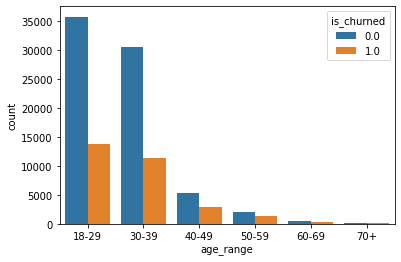

In [72]:
# Visualising the churn rate as per age groups
sb.countplot(x='age_range',hue='is_churned', data=data)

Here we can see most of the churn rate is in the age groups of 18-29 and 30-39 but at the same time the retained customer ratio is also more in those age groups.

But, if you observe in the age groups of 40-49 and 50-59 the customer churn ratio is more than 50%. 

We need to concentrate on 40+ age group people also to make sure they use our app by developing new innovations.

(-0.7, 39.7)

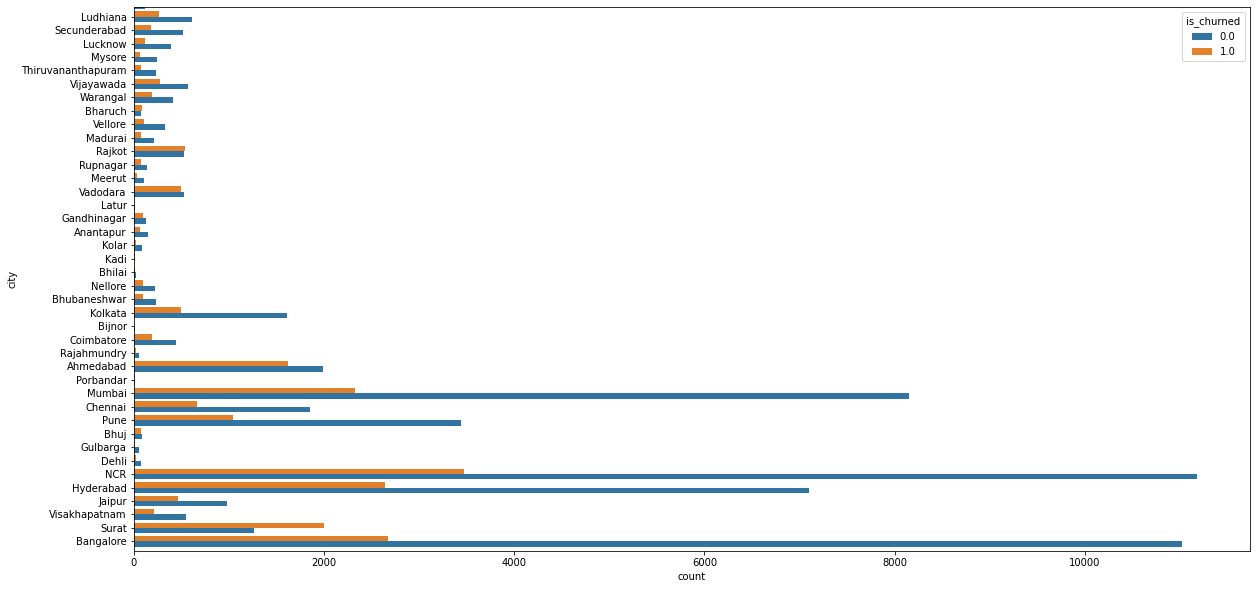

In [86]:
# Visualize the churn count as per city
dims = (20,10)
fig,ax = pyplot.subplots(figsize=dims)
sb.countplot(ax=ax, y='city', hue='is_churned', data=data)
ax.set_ylim(-0.7, 39.7)

(39.7, 79.7)

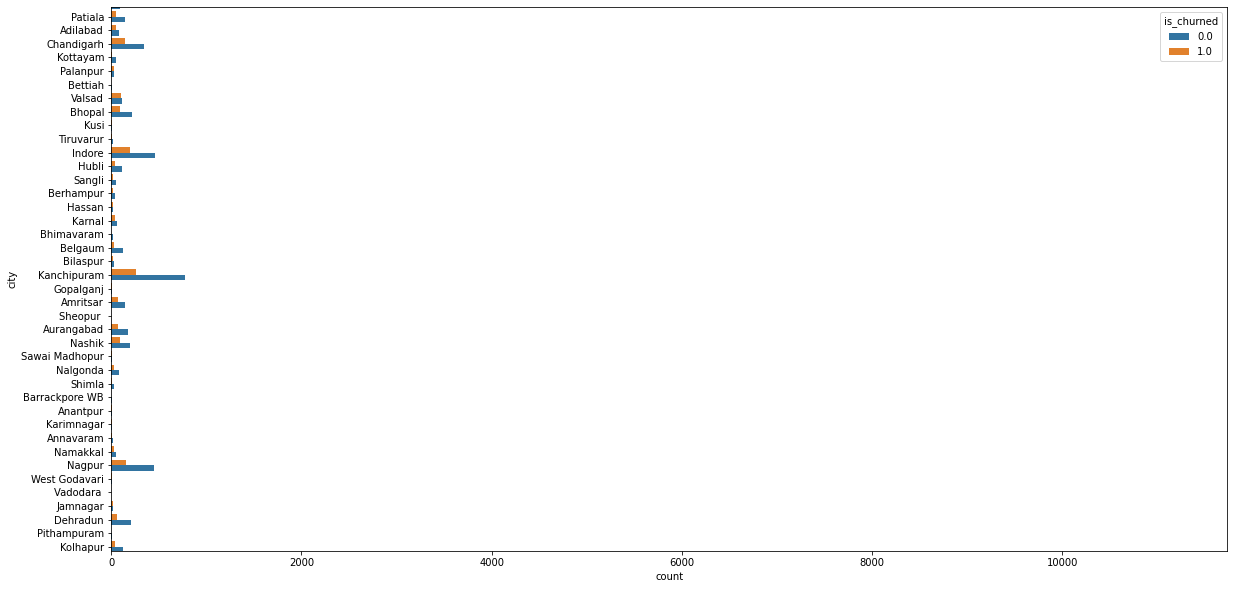

In [87]:
# Visualize the churn count as per city
dims = (20,10)
fig,ax = pyplot.subplots(figsize=dims)
sb.countplot(ax=ax, y='city', hue='is_churned', data=data)
ax.set_ylim(39.7, 79.7)

City is also play a major role in customer churn rate, **The ratio of churn rate of customers who are living in non-metro cities is more when compared to the ratio of churn rate in metro cities**.

This is basically, the people who are living in metro cities will use credit card more often than the prople who are living in non-metro cities.

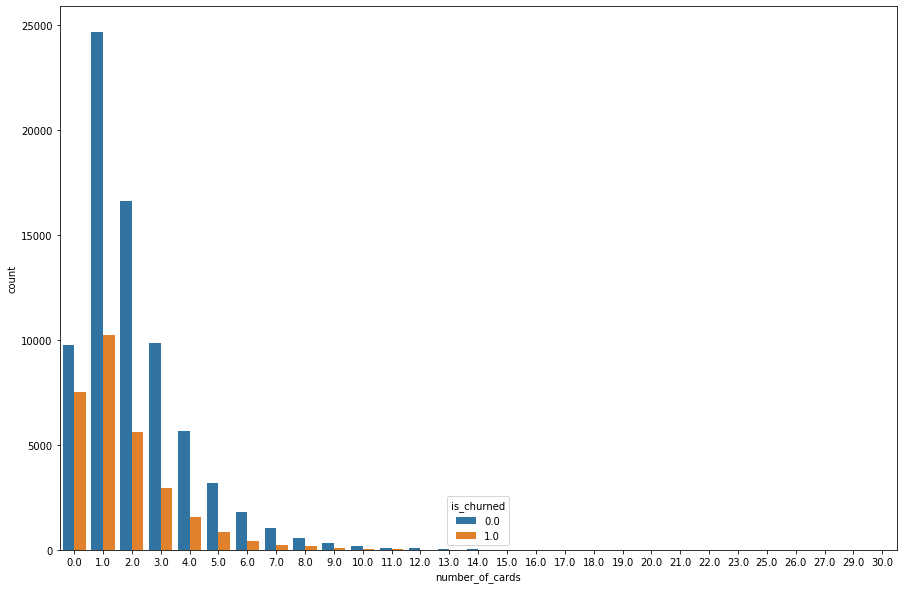

In [96]:
# Visualize the churn count as per number of cards
dims = (15,10)
fig,ax = pyplot.subplots(figsize=dims)
sb.countplot(ax=ax, x='number_of_cards', hue='is_churned', data=data)
# ax.set_ylim(39.7, 79.7)

By above plot we can see that churn ratio is more for the customers who are not even having a single card.

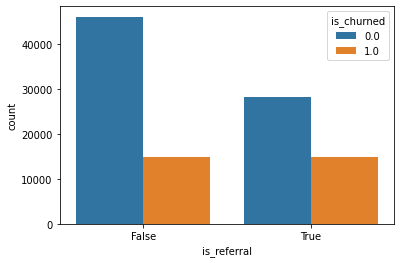

In [97]:
# Visualize the churn count as per referral
sb.countplot( x='is_referral', hue='is_churned', data=data)

From the above plot, it looks like referral does not play a role in customer churn.

Let's have a prediction model to check which attribute is contributing more for customer churn.

## Prediction Model

Let's check the distribution of each attribute

In [101]:
new_data = data.drop(['age_range','user_id'],axis=1)

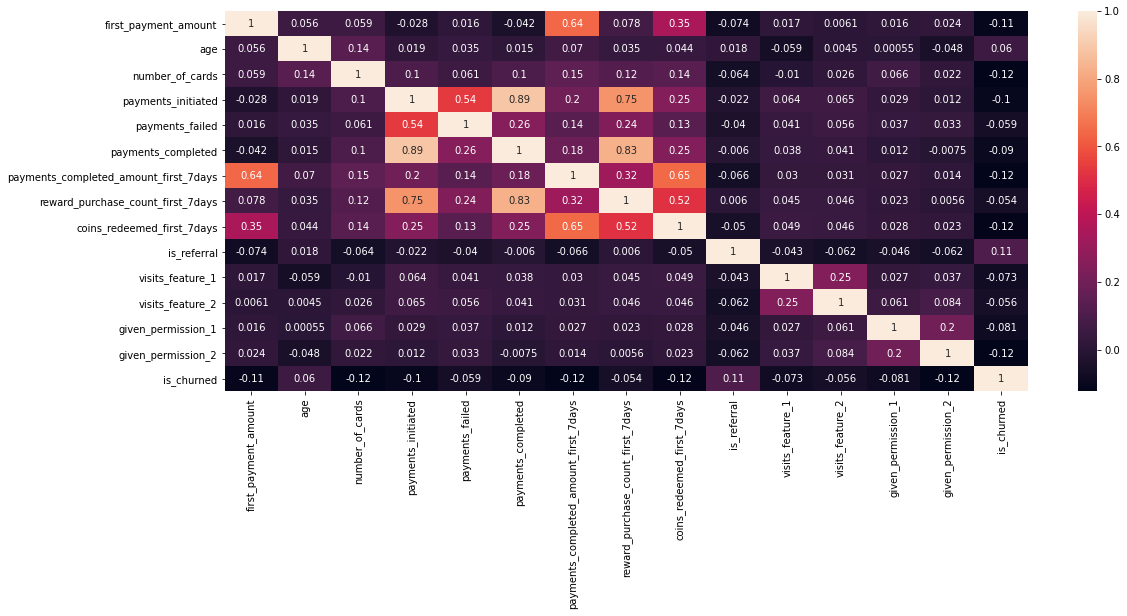

In [102]:
# Let's check the correlation of the each attribute
plt.figure(figsize=[18,7])
sb.heatmap(new_data.corr(), annot=True)
plt.show()

Let's check the columns having correlation more than 0.7

In [104]:
# Let's check the column having correlation more than 0.7
columns = []
for i in range(len(new_data.corr().keys())):
  for j in range(i):
    if abs(new_data.corr().iloc[i,j]) > 0.7:
      columns.append(new_data.corr().columns[i])
print(columns)

['payments_completed', 'reward_purchase_count_first_7days', 'reward_purchase_count_first_7days']


For a model we should not have high correlation variables. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

Let's remove the above columns from the data.

In [105]:
new_data = new_data.drop(['payments_completed', 'reward_purchase_count_first_7days', 'reward_purchase_count_first_7days'],axis=1)
new_data.columns

Index(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned'],
      dtype='object')

Let's check the missing values in the data

In [106]:
# Checking the missing values in the data
new_data.isna().sum()

device                                    118
first_payment_amount                        0
age                                       142
city                                     5842
number_of_cards                           472
payments_initiated                        472
payments_failed                           472
payments_completed_amount_first_7days     472
coins_redeemed_first_7days                472
is_referral                                 0
visits_feature_1                         2646
visits_feature_2                         2646
given_permission_1                          0
given_permission_2                          0
is_churned                                  0
dtype: int64

Since the missing values are not more than 30% of the entire data, we can drop these rows.

In [109]:
# droping the missing rows
final_data = new_data.dropna()
final_data.isna().sum()

device                                   0
first_payment_amount                     0
age                                      0
city                                     0
number_of_cards                          0
payments_initiated                       0
payments_failed                          0
payments_completed_amount_first_7days    0
coins_redeemed_first_7days               0
is_referral                              0
visits_feature_1                         0
visits_feature_2                         0
given_permission_1                       0
given_permission_2                       0
is_churned                               0
dtype: int64

Converting categorical variables into dummy variables.

In [111]:
# creating dummy variables
df_dummies = pd.get_dummies(final_data, drop_first=True)
df_dummies

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed_amount_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,is_churned,device_acer,device_apple,device_asus,device_billion,device_blackberry,device_blackshark,device_blu,device_celkon,device_centric,device_comio,device_coolpad,device_doogee,device_eastaeon,device_elephone,device_essential products,device_foxconn international holdings limited,device_foxda,device_gionee,device_google,device_haier,device_hmd global,device_hmd global oy,device_htc,device_huawei,device_iball slide,device_infinix,device_infinix mobility limited,...,city_Yavatmal,city_agra,city_ahmedabad,city_ambikapur,city_anand gujrat,city_assam,city_azamgarh,city_bhopal,city_bilaspur,city_california,city_cambodia,city_coast of North Goa,city_dholpur,city_goa,city_godavari,city_godaveri,city_gorakhpur,city_indore,city_jammu and Kashmir,city_kabirdham,city_kamatchi nagar,city_kanpur,city_kerala,city_latur,city_ludhiana,city_malda,city_nagaland,city_nnur Taluk of Coimbatore,city_north carolina,city_odisha,city_ooty,city_pilani,city_pinjor,city_raigarh,city_shahdol,city_srinagar,city_tamilnadu,city_vadodara,city_vapi,city_vijaywada AP
0,7.0,25.0,1.0,2.0,0.0,7.0,0.0,False,0.0,1.0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,31.0,1.0,1.0,0.0,5.0,3.0,True,0.0,0.0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,24.0,3.0,2.0,0.0,124.0,0.0,False,0.0,0.0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,29.0,1.0,2.0,0.0,0.0,0.0,True,0.0,0.0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3.0,27.0,0.0,1.0,0.0,3.0,0.0,False,0.0,1.0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104137,3.0,30.0,3.0,4.0,1.0,48.0,3.0,False,0.0,0.0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104138,10.0,37.0,6.0,7.0,4.0,158.0,77.0,True,1.0,1.0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104139,6.0,24.0,1.0,1.0,0.0,6.0,3.0,True,0.0,0.0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104140,33.0,34.0,2.0,1.0,0.0,33.0,0.0,True,0.0,0.0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's split the data into train and test data.

In [112]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x = df_dummies.drop(['is_churned'], axis=1)
y = df_dummies['is_churned']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

Let's normalise the data to make sure data in certain range as well as to eliminate the outliers if any.

In [113]:
# Normalising the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(xtrain)
scal_xtrain = norm_fit.transform(xtrain)
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)

[[0.00297483 0.36666667 0.03333333 ... 0.         0.         0.        ]
 [0.01899314 0.1        0.         ... 0.         0.         0.        ]
 [0.01716247 0.31666667 0.06666667 ... 0.         0.         0.        ]
 ...
 [0.00366133 0.1        0.06666667 ... 0.         0.         0.        ]
 [0.01167048 0.13333333 0.03333333 ... 0.         0.         0.        ]
 [0.00228833 0.11666667 0.03333333 ... 0.         0.         0.        ]]


Let's have a prediction model by using the random forest classifier

In [114]:
# Prediction model by using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rnd = RandomForestClassifier()
rnd_fit = rnd.fit(scal_xtrain,ytrain)
rnd_score = rnd.score(scal_xtest,ytest)
print("Score of the Model is :{}".format(rnd_score))

Score of the Model is :0.7805911587758305


In [115]:
# Let's print the classification report
y_predict = rnd.predict(scal_xtest)
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     16522
         1.0       0.35      0.69      0.46      2593

    accuracy                           0.78     19115
   macro avg       0.64      0.74      0.66     19115
weighted avg       0.86      0.78      0.81     19115



From the report, I can see that the recall of the model is about 79% meaning the model is correctly identified about 79% of the customers that were retained and missed about 21%.

The precision of the model was about 94% and the f1-score was about 86%. The accuracy of the model was about 78% which is better than the 71%.

The following code creates a bar plot of the top 10 features for predicting customer churn:

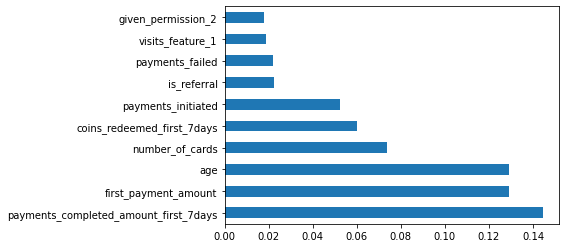

In [119]:
feat_importance = pd.Series(rnd.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')

Based on this data, we can see that *payments_completed_amount_first_7days* has the highest impact on customer churn followed by 'first_payment_amount' and 'age'.

## Conclusion

How would you measure user churn for the said app?

=> Based on the prediction model, we can see that **payments_completed_amount_first_7days** has the highest impact on customer churn followed by 'first_payment_amount' and 'age'.

a. **Insights**:



*   About 71.31% of the customers are using the App or were retained and about 28.68% of the customers churned. When we are trying to evaluate the model to predict customer churn, this is important information because it means that just by always guessing a random customer to have been retained from the data set, I have a 71.31% chance of guessing correctly. So, I want the model accuracy to classify/predict if a customer will churn to be higher than that percentage.
*   Devices play one of the major role in customer churn, it might be related with the push notifications of the Application. For instance, most of older version devices won't be getting the push notifications on time.
*   Majority of the customers (16792/29869) who has not done any first payment are marked as churned. The customer didn't even make a first payment, it means he didn't even use the application so, in that case how can we mark a customer as churned?
*   Most of the churn rate is in the age groups of 18-29 and 30-39 but at the same time the retained customer ratio is also more in those age groups. But, if you observe in the age groups of 40-49 and 50-59 the customer churn ratio is more than 50%.
*   City is also plays a major role in customer churn rate, The ratio of churn rate of customers who are living in non-metro cities is more when compared to the ratio of churn rate in metro cities. This is basically, the people who are living in metro cities will use credit card more often than the prople who are living in non-metro cities.
*   Churn ratio is more for the customers who are not even having a single card.

b. **Recommendations**:


*   Most of older version devices won't be getting the push notifications on time. This need to be checked with the technical team.
*   We need to concentrate on 40+ age group people also to make sure they use our app by developing new innovations.

*   Decrease the marketing campaigns in metro cities where most of the users using our app and concentrate more on those cities where our app is not using very often.

c. **Additional Data**:


*   Tenure/Time Period (Using the app)
*   Gender 












